## Assignment 3 - model - group 28

In [363]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


**Collecting the data**

In [364]:
# Importing Dataset

data = pd.read_csv("recruitmentdataset-2022-1.3.csv")

**Describe the data**

In [365]:
# Test printing

data.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
5,x9063d,female,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,True
6,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True


In [366]:
df_company = data[data['company']=='A']
df_company

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
996,x5868g,male,22,Dutch,Running,69,False,True,False,False,1,True,bachelor,A,False
997,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False
998,x6907b,male,25,Dutch,Tennis,65,False,True,False,False,1,True,master,A,False


In [367]:
filtered_df = df_company[df_company['sport'].str.contains('Swimming|Golf|Football', case=False)]

In [368]:
filtered_df.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True
10,x9775f,female,27,Dutch,Football,61,False,False,False,False,1,True,bachelor,A,False
11,x3562f,male,28,Dutch,Football,56,False,False,False,True,2,False,bachelor,A,True
12,x4044c,female,27,German,Football,62,False,True,False,False,1,True,bachelor,A,False
13,x9428d,male,26,Dutch,Football,56,False,False,False,False,1,False,bachelor,A,False


In [369]:
filtered_df.shape

(492, 15)

In [370]:
filtered_df.describe()

,age,ind-university_grade,ind-languages
count,492.000000,492.000000,492.000000
mean,26.247967,61.833333,1.392276
std,2.602579,5.853321,0.848253
min,21.000000,47.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,66.000000,2.000000
max,32.000000,77.000000,3.000000


In [371]:
sport_counts = filtered_df['sport'].value_counts()
sport_counts

Football    243
Swimming    163
Golf         86
Name: sport, dtype: int64

In [372]:
nationality_counts = filtered_df['nationality'].value_counts()
nationality_counts

Dutch      367
German      68
Belgian     57
Name: nationality, dtype: int64

In [373]:
hired_counts = filtered_df['decision'].value_counts()
hired_counts

False    277
True     215
Name: decision, dtype: int64

In [374]:
degree_counts = filtered_df['ind-degree'].value_counts()
degree_counts

bachelor    260
master      205
phd          27
Name: ind-degree, dtype: int64

In [375]:
gender_counts = filtered_df['gender'].value_counts()
gender_counts

male      267
female    217
other       8
Name: gender, dtype: int64

In [376]:
languages_counts = filtered_df['ind-languages'].value_counts()
languages_counts

1    210
2    164
0     69
3     49
Name: ind-languages, dtype: int64

**Explore the data**

**Data Preparation**

**Modelling the data**

In [377]:
df_train, df_test = skl.model_selection.train_test_split(filtered_df, test_size=0.20, random_state=9, shuffle=True)
df_train.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
510,x7641d,female,27,Dutch,Football,63,False,False,False,False,1,True,master,A,False
204,x1289g,female,27,Dutch,Football,70,False,True,False,False,1,True,master,A,False
377,x4495f,male,29,German,Football,57,False,False,True,True,2,False,master,A,True
481,x6270e,male,27,Dutch,Swimming,68,False,True,False,False,1,True,bachelor,A,False
357,x9704c,male,31,German,Golf,58,False,False,True,False,0,False,master,A,False


In [378]:
X_train = df_train[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_train = df_train['decision']
X_val = df_val[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_val = df_val['decision']
X_test = df_test[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_test = df_test['decision']

In [379]:
# Define preprocessing steps
categorical_features = ['gender', 'nationality', 'sport', 'ind-degree', 'ind-exact_study']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['age', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-languages']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

In [380]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'ind-university_grade',
                                                   'ind-debateclub',
                                                   'ind-programming_exp',
                                                   'ind-international_exp',
                                                   'ind-languages']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'nationality',
   

In [381]:

# Define hyperparameters to search
param_grid = {
    'classifier__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'classifier__min_samples_split': [2, 5, 6, 10, 13, 15]  ,
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_.named_steps['classifier']
print(best_classifier)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=13)


Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.69      0.78       225
        True       0.68      0.89      0.77       168

    accuracy                           0.77       393
   macro avg       0.79      0.79      0.77       393
weighted avg       0.80      0.77      0.77       393



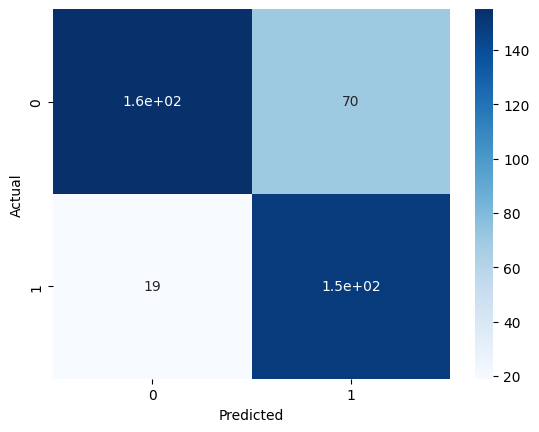

In [382]:
# Make predictions on the training set
y_pred = grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, y_pred))

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.67      0.73        43
        True       0.67      0.81      0.73        36

    accuracy                           0.73        79
   macro avg       0.74      0.74      0.73        79
weighted avg       0.75      0.73      0.73        79



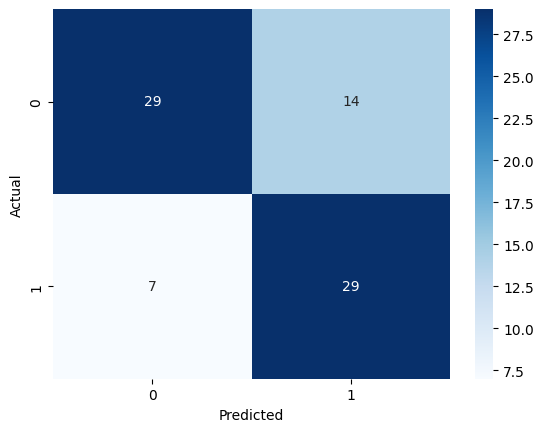

In [383]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_val)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))


sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Hari\AppData\Local\Programs\Python\Python37\lib\site-packages

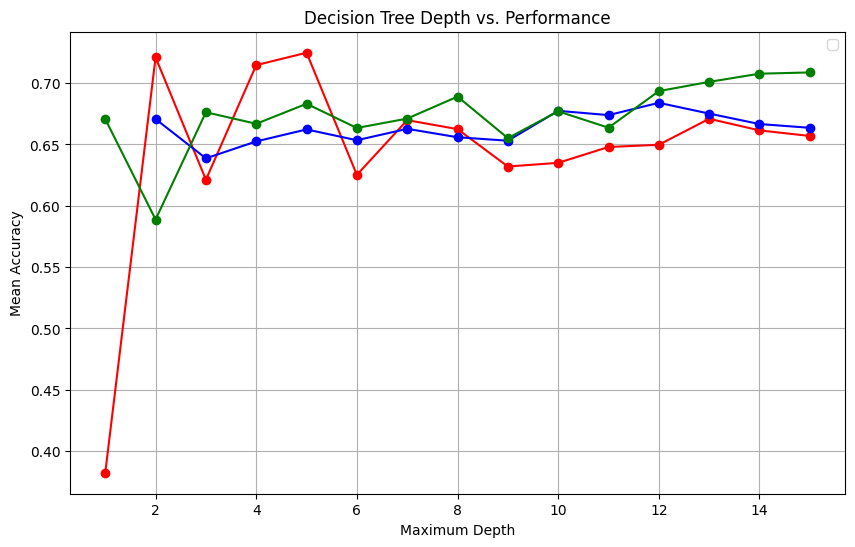

In [384]:


# Define a range of maximum depths to test
max_depths = np.arange(1, 16)  # You can adjust the range as needed
min_samples_split_values = [2, 5, 6, 10, 13, 15]  
min_samples_leaf_values = [1, 2, 4]

# Initialize lists to store mean cross-validation scores for each depth
mean_scores_depth = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_depth.append(mean_score)

mean_scores_samples = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_split=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_samples.append(mean_score)

mean_scores_leaves = []

# Iterate over different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current depth
    classifier = DecisionTreeClassifier(min_samples_leaf=depth, random_state=42)

    # Create a pipeline with the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    # Perform cross-validation (adjust cv parameter as needed)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Compute the mean score for this depth
    mean_score = np.mean(scores)
    mean_scores_leaves.append(mean_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_scores_depth, marker='o', linestyle='-', color='red')
plt.plot(max_depths, mean_scores_samples, marker='o', linestyle='-', color='blue')
plt.plot(max_depths, mean_scores_leaves, marker='o', linestyle='-', color='green')
plt.title('Decision Tree Depth vs. Performance')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.73      0.78        52
        True       0.74      0.83      0.78        47

    accuracy                           0.78        99
   macro avg       0.78      0.78      0.78        99
weighted avg       0.78      0.78      0.78        99



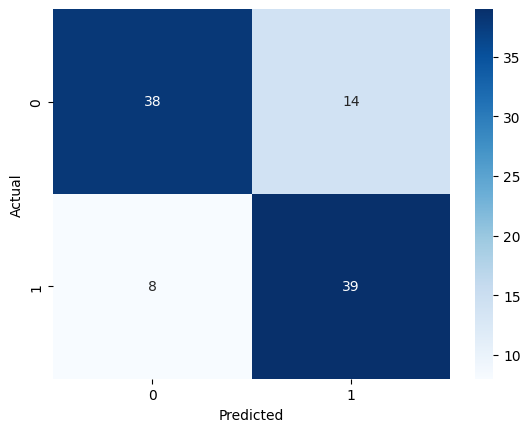

In [385]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_test)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()